In [1]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from salishsea_tools import tidetools
from salishsea_tools import (nc_tools,viz_tools)
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.cm as cm

from matplotlib import animation

from numpy import *
from pylab import *

import glob

In [27]:
rd = NC.Dataset('/ocean/xiaoxiny/research/Ariane/backward2_trajectories_qualitative.nc','r');
rd_lont=rd.variables['traj_lon'][:,1::2]
rd_latt=rd.variables['traj_lat'][:,1::2]
rd_dept=rd.variables['traj_depth'][:,1::2]
rd_xs=rd.variables['init_x'][:]
rd_ys=rd.variables['init_y'][:]
print rd_lont.shape


bathy=NC.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][:,:]

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/*.nc'))
ptrc=NC.Dataset(nc_filename[0])
lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]

(74, 6)


In [32]:
print rd_lont.min(),rd_lont.max()
print rd_lont[:,1]

-503.289137715 165.977271546
[-246.76317596435547 -204.43433634566478 90.20161801228548
 46.50354058907366 -92.27211878420388 96.0004891651186 -104.85292883900077
 -220.48909531055114 24.651461145548254 -116.72772370954004
 -172.52824731268868 -208.80042304561604 -213.0143959949684
 -91.48060779125478 41.07824202297221 -116.39238690271637 -91.8095542710605
 -31.34288329530193 -94.86399116320825 -29.300210554128753
 -134.42974765586172 -81.18655798629015 -204.52656183002344
 42.30152994422005 -9.0259170824542 -44.81715633351638 -163.48949954202575
 -41.112874503513794 -45.82195905652232 -167.16921569472024
 -27.954089112679156 25.027226272909516 -109.39607919137643
 -94.04982124902935 -75.76085564549774 48.16381894009102 54.39720005807399
 -75.07237343044989 84.79459207654682 -84.96965920511337 -70.62057568131826
 148.3818008085907 18.74887944339102 60.70814215024293 -139.3916925580514
 75.33536578470331 -53.840187556791776 165.97727154646043 132.0275134746184
 -192.49896351465435 86.02

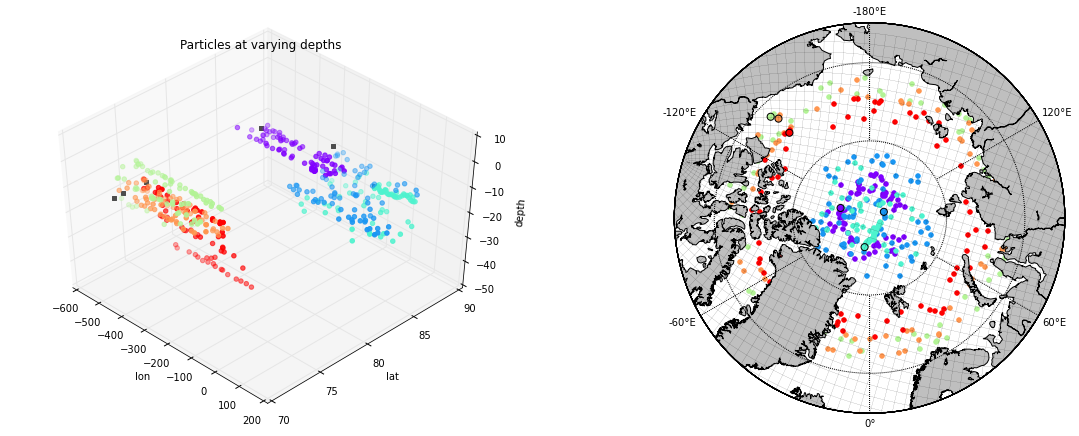

In [29]:
# 3D
n = np.arange(rd_lont.shape[1])
colors = cm.rainbow(np.linspace(0, 1, len(n)))

fig = plt.figure(figsize=(20,7))
ax = ax2 = fig.add_subplot(1, 2, 1, projection='3d')

for N,c in zip(n,colors):
    ax.scatter(rd_lont[1:,N],rd_latt[1:,N],rd_dept[1:,N],color=c) 
    ax.scatter(rd_lont[0,N],rd_latt[0,N],rd_dept[0,N],color='0.30',marker='s')
       
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('depth')
ax.set_title('Particles at varying depths')
ax.view_init(elev=45, azim=-45)


ax1 = fig.add_subplot(122)
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round=True)
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
tracex,tracey=m(rd_lont,rd_latt)
for N,c in zip(n,colors):
    m.scatter(tracex[1:,N],tracey[1:,N],marker='o',color=c)
m.scatter(tracex[0,:],tracey[0,:],c=colors,s=50)
plt.show()

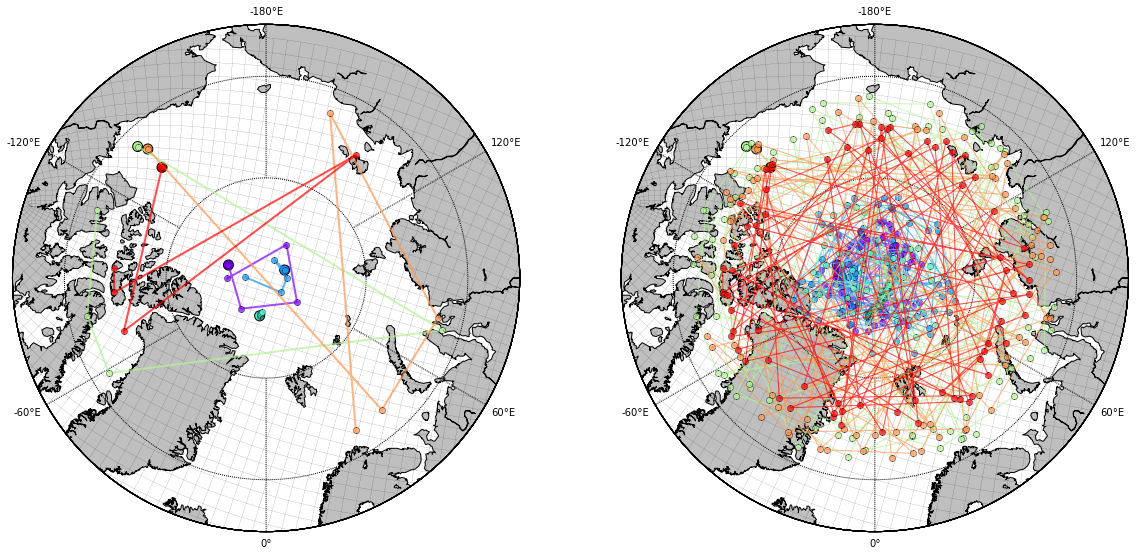

The plot at the lhs only displays the first 5 points in each trajectory.


In [30]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round=True)
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
tracex,tracey=m(rd_lont,rd_latt)
for N,c in zip(n,colors):
    m.plot(tracex[0:5,N],tracey[0:5,N],marker='o',color=c,alpha=0.7,lw=2)
m.scatter(tracex[0,:],tracey[0,:],c=colors,s=100)

ax1 = fig.add_subplot(1,2,2)
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round=True)
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
tracex,tracey=m(rd_lont,rd_latt)
for N,c in zip(n,colors):
    m.plot(tracex[0:,N],tracey[0:,N],marker='o',color=c,alpha=0.7)
m.scatter(tracex[0,:],tracey[0,:],c=colors,s=100)
plt.show()

print ('The plot at the lhs only displays the first 5 points in each trajectory.')

In [33]:
#try to place the init. points somewhere else. 

rd = NC.Dataset('/ocean/xiaoxiny/research/Ariane/result/backward_trajectories_qualitative.nc','r');
rd_lont=rd.variables['traj_lon'][:]
rd_latt=rd.variables['traj_lat'][:]
rd_dept=rd.variables['traj_depth'][:]
rd_xs=rd.variables['init_x'][:]
rd_ys=rd.variables['init_y'][:]
print rd_lont.min(),rd_lont.max()

-71.1250752811 -20.875


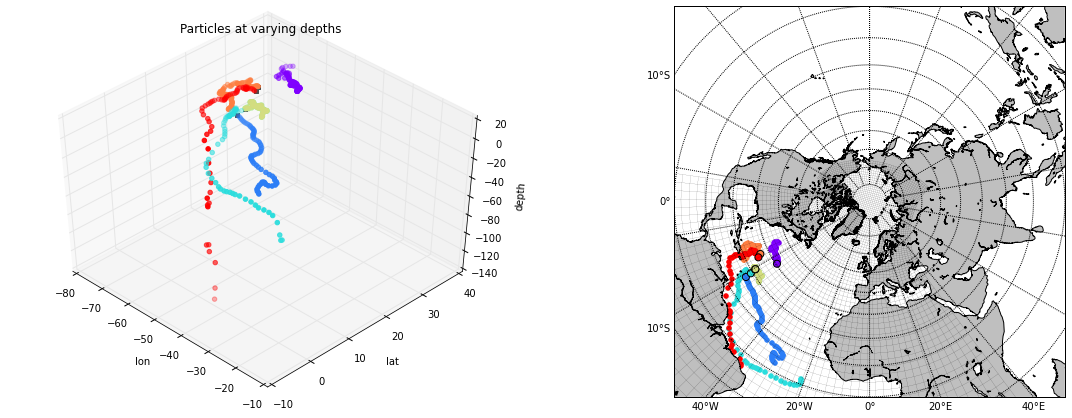

In [18]:
# 3D
n = np.arange(7)
colors = cm.rainbow(np.linspace(0, 1, len(n)))

fig = plt.figure(figsize=(20,7))
ax = ax2 = fig.add_subplot(1, 2, 1, projection='3d')

for N,c in zip(n,colors):
    ax.scatter(rd_lont[1:,N],rd_latt[1:,N],rd_dept[1:,N],color=c) 
    ax.scatter(rd_lont[0,N],rd_latt[0,N],rd_dept[0,N],color='0.30',marker='s')
       
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('depth')
ax.set_title('Particles at varying depths')
ax.view_init(elev=45, azim=-45)



ax1 = fig.add_subplot(122)
m = Basemap(projection='npstere',boundinglat=0,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x_lon,y_lat = m(lon,lat)
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
tracex,tracey=m(rd_lont,rd_latt)
for N,c in zip(n,colors):
    m.scatter(tracex[1:,N],tracey[1:,N],marker='o',color=c)
m.scatter(tracex[0,:],tracey[0,:],c=colors,s=50)
plt.show()